# Decision Tree

## 시각화

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
iris = load_iris() # 붓꽃데이터 로드
iris.keys() # iris 데이터 확인

X = iris.data[:, 2:] # petal length & petal width
y = iris.target

tree = DecisionTreeClassifier(max_depth = 2, random_state = 42) # max_depth : 결정나무의 깊이 즉 가지갈래의 개수라고 생각하면 쉬움
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(223.2, 362.4, 'petal width <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.6, 217.44, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 217.44, 'petal width <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(223.2, 72.47999999999996, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(446.4, 72.47999999999996, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

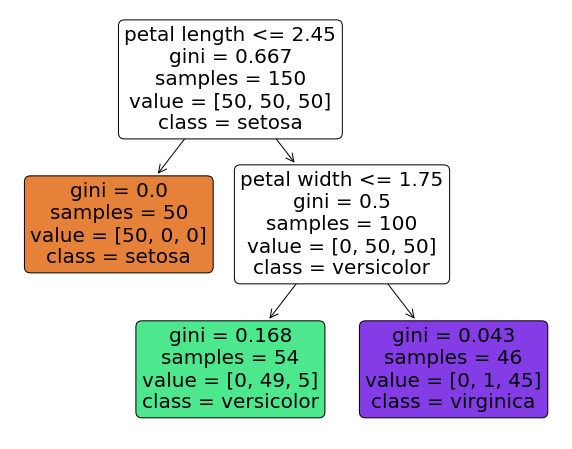

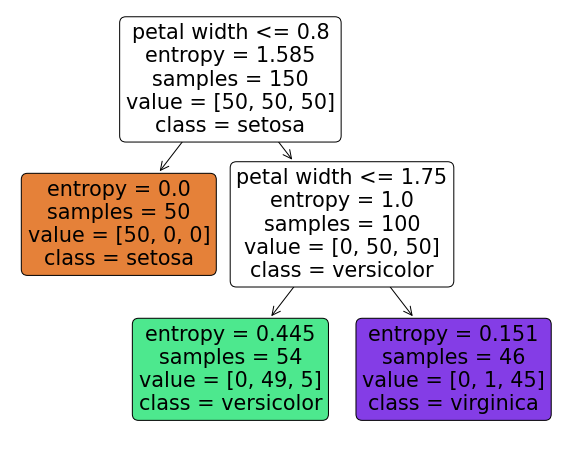

In [3]:
 # 책에 있는 코드
# from sklearn.tree import export_graphviz # 그래프 정의를 파일로 출력해 훈련된 결정트리 시각화

# export_graphviz(tree,
#                out_file = 'iris_tree.dot',
#                 feature_names = iris.feature_names[2:],
#                 class_names = iris.target_names,
#                 rounded = True,
#                 filled = True)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plot_tree(tree,
         feature_names = ['petal length','petal width'],
         class_names = iris.target_names,
         filled = True, # filled : 분류에 따라 색칠
         rounded = True # rounded : 박스 모서리 둥글게
         )

tree_ent = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
tree_ent.fit(X,y)
plt.figure(figsize=(10,8))
plot_tree(tree_ent,
         feature_names = ['petal length','petal width'],
         class_names = iris.target_names,
         filled = True, # filled : 분류에 따라 색칠
         rounded = True # rounded : 박스 모서리 둥글게
         )

## 예측 및 클래스 확률 추정
<img src = 'image/iris_tree.jpg' width = '450' heigth = '450'>
<br><br>

### gini impurity
$$G_i = 1-\sum_{k=1}^n {p_{i,k}}^2$$

### entropy
$$ E_i = 1-\sum_{k=1}^n {p_{i,k}}   log_2(p_{i,k})$$

* 계산
<img src = 'image/cal.png' width='400' height='400'>

### CART(classification and regression tree)
$$ J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$$

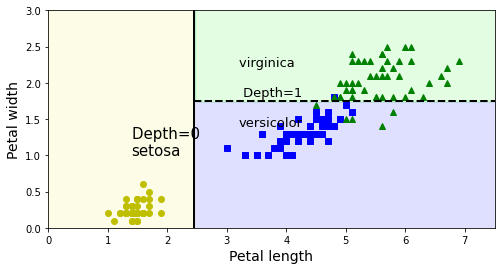

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0 \nsetosa", fontsize=15)
plt.text(3.2, 1.4, "virginica \n\n Depth=1 \n\nversicolor", fontsize=13)

plt.savefig("image/decision_tree_decision_boundaries_plot")

In [5]:
display(tree.predict_proba([[3.7,2.47]])) # [0/46, 1/46, 45/46]
tree.predict([[3.7,2.47]]) # virginica로 분류

array([[0.        , 0.02173913, 0.97826087]])

array([2])

## 규제 매개변수

[매개변수 참고](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

DecisionTreeClassifier()
* max_depth : 최대 깊이 제어
* min_samples_split : 노드가 분할되기 위해 가져야하는 최소 샘플 수
* min_samples_leaf : leaf node가 가져야하는 최소 샘플 수 
* max_leaf_nodes : leaf node의 최대 개수
* max_features : 각 노드에서 분할에 사용할 최대 특성수

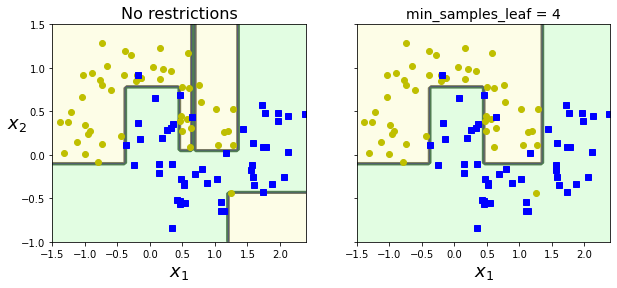

In [6]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.savefig('image/parameter.png')

## 회귀
**DecisionTreeRegressor**
<br>
* class가 아닌 value를 예측
### CART COST FUNCTION
<img src = 'image/cart.jpeg' width = '300' height='300'>

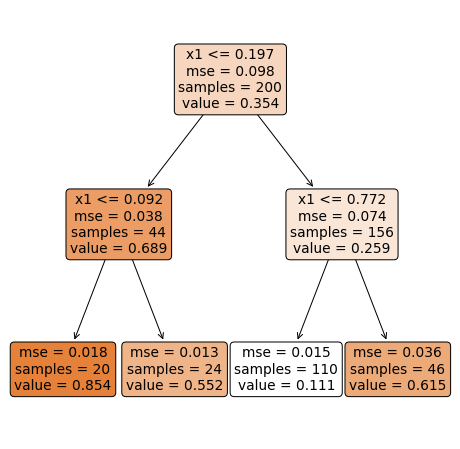

In [7]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

plt.figure(figsize = (8,8))
plot_tree(tree_reg,
         feature_names = ['x1'],
         rounded = True,
         filled = True)

plt.savefig('image/mse.png')

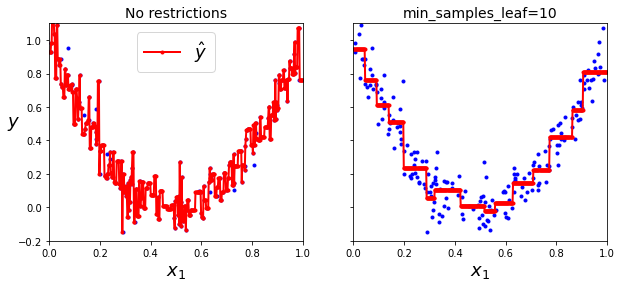

In [8]:
tree_reg1 = DecisionTreeRegressor(random_state=42) # 규제 x
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # 규제 o
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.savefig('image/compare.png')

## 불안정성
* 훈련 데이터의 회전에 민감함 => PCA
* 사소한 훈련 데이터 변화에도 민감함 => RANDOM FOREST

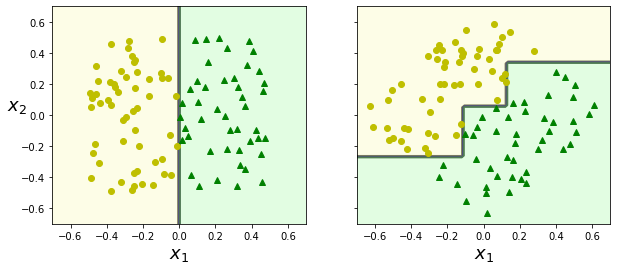

In [9]:
# 1. 훈련 데이터의 회전

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.savefig('image/rotation.png')

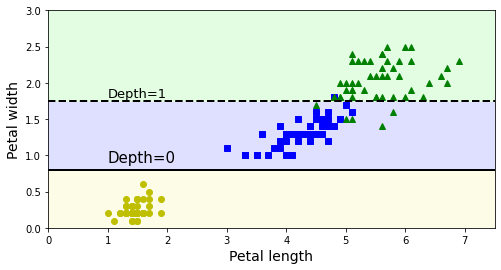

In [10]:
# 2. 사소한 훈련 데이터 변화 -> 가장 넓은 꽃잎 샘플 1개만 삭제하고 결정트리분류 진행
iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.savefig('image/change.png')